# Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
# to read excel file
Housing = pd.read_csv("FULLEXCEL.csv")

In [4]:
#gives value of top 5 rows
Housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
Housing.info()
#gives index value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
Housing['CHAS'] 
#gives value

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [7]:
Housing['CHAS'].value_counts()
# gives value counts

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
#Informatin about data
Housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288509,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704863,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.630000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#To plot histogram
%matplotlib inline

In [10]:
# For plotting histogram (made comment coz it takes more time)
#import matplotlib.pyplot as plt
#Housing.hist(bins=50, figsize=(20, 15))

# Train-Test Splitting

In [11]:
# Defining function manually for Train-Test data splitting
#For learning purpose
#import numpy as np

#def split_train_test(data, test_ratio):
   # np.random.seed(42)
   #shuffled = np.random.permutation(len(data))
   # print(shuffled)
   #test_set_size = int(len(data) * test_ratio)
   # test_indices = shuffled[:test_set_size]
   # train_indices = shuffled[test_set_size:]
   # return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
#train_set, test_set = split_train_test(Housing, 0.2)

In [13]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [14]:
# train-test splitting function already written in scikit learn library... now we will import from scikit learn library
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [15]:
# Appling stratefied sampling on CHAS to distribute equally among train & test data as it is very imp. feature
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Housing, Housing['CHAS']):
    strat_train_set = Housing.loc[train_index]
    strat_test_set = Housing.loc[test_index]

In [16]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,NaN,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [17]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [18]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.311570,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.667226,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.928250,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.542250,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
CRIM       102 non-null float64
ZN         102 non-null float64
INDUS      102 non-null float64
CHAS       102 non-null int64
NOX        102 non-null float64
RM         100 non-null float64
AGE        102 non-null float64
DIS        102 non-null float64
RAD        102 non-null int64
TAX        102 non-null int64
PTRATIO    102 non-null float64
B          102 non-null float64
LSTAT      102 non-null float64
MEDV       102 non-null float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [20]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [21]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [22]:
#95/7


In [23]:
#376/28

In [24]:
# 0 & 1  ratio came same in train & test data ...so this way..stratified sampling works....4 our regression (to predict price CHAS feature very important) 

In [25]:
# Housing me i copied.....train set...this step i did after compeleting missing vale(imputer) coz data set is small..when data set big 
#first take copy then go ahead wt coreratn nd all....
Housing = strat_train_set.copy()

# Looking for correlaions

In [26]:
# coreration function of pandas library
corr_matrix = Housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678018
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005248837048>,
      dtype=object)

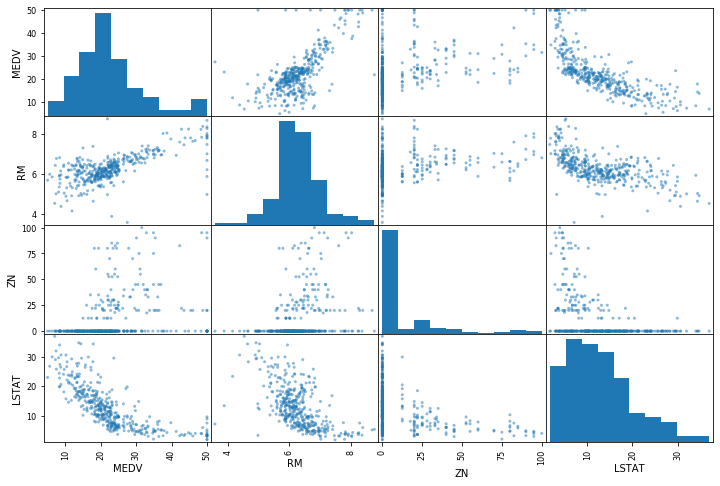

In [27]:
#plotting using pandas library...(do take help of google when not run)
from pandas.plotting import scatter_matrix 
attributes = ["MEDV","RM","ZN","LSTAT" ]
scatter_matrix(Housing[attributes], figsize = (12,8))

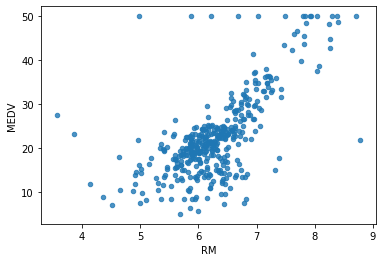

In [28]:
Housing.plot(kind="scatter" , x="RM", y="MEDV", alpha=0.8)

# Trying out Attributes Combinations

In [29]:
Housing["TAXRM"] = Housing["TAX"]/Housing["RM"]

In [30]:
# we created highly another attribute
Housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [31]:
Housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [32]:
#we aa getting highly -ve corelaton btwn MADV ND TAXRM
corr_matrix = Housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678018
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526270
LSTAT     -0.740494
Name: MEDV, dtype: float64

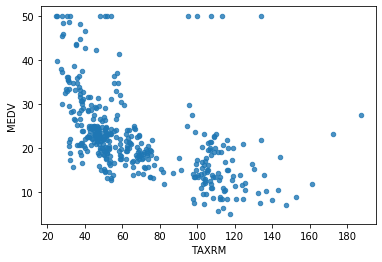

In [33]:
Housing.plot(kind="scatter" , x="TAXRM", y="MEDV", alpha=0.8)

In [34]:
##Do this after selecting desired model step for dragon real estate
Housing = strat_train_set.drop("MEDV", axis=1)
Housing_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [35]:
#to get rid of missing attributes we have 3 methods:
#1. Get rid of missing data points
#2. Get rid of the whole attribute
#3. set the value to 0,mean or median(some value).

In [36]:
a = Housing.dropna(subset = ["RM"])  #option 1..original dataframe will remail unchanged...
a.shape

(401, 13)

In [37]:
#RM column removed..original dataframe will remail unchanged...
Housing.drop("RM", axis=1)  #option=2

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [38]:
#1 column removed ....thr is no RM column nd original dataframe will remail unchanged...
Housing.drop("RM", axis=1).shape

(404, 12)

In [39]:
#option 3
median = Housing["RM"].median()

In [40]:
#computing median for option 3
median

6.216

In [41]:
#original dataframe will remail unchanged...
Housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [42]:
Housing.shape

(404, 13)

In [43]:
Housing.describe() #before we started filling missing attribute 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282758,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714625,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(Housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [45]:
# it calculates median value for all 15 columns....we made like kisi b jgh missing value ho to wo set ho jae..
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [46]:
#by transform we changed value of all columns(x-axis 4 columns)
x = imputer.transform(Housing)

In [47]:
Housing_tr = pd.DataFrame(x, columns=Housing.columns)

In [48]:
#we can see count is again  506...like this imputer works..fills value of NA.
Housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282262,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1.Estimators - It estimates some parameter based on a dataset, eg. imputer It has a fit method and transform method...
Fit method - Fits the dataset and calculate internal parameters.
2.Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform which fits and then transforms.
3.Predictors - LinearRegression model is an example of predictor. Fit() and predict() are two common function.It also gives score function which will evaluate the predictions. 

# Feature Scaling

Primarily two types of feature scaling methods:
    1.Min-max scaling (Normalization) #we do so to bring value in the range...all will come in the range 0-1.can do this in exl
  (value - min)/(max-min) 
  Sklearn provides a class called MinMaxScaler for this
    2.Standardization
    (value - mean)/std      (this is gud coz if we change value it wont effect much coz we using mean nd std deviation)     
    Sklearn provides a class called Standard Scaler for this.
    

# Creating a pipeline

In [49]:
# pipeline means writing some codes that will also help later and can make changes in the code accordingly if required.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                       #   ..... add as many as you want in your pipeline
                       ('std_scaler', StandardScaler()),])

In [51]:
Housing_num_tr = my_pipeline.fit_transform(Housing)

In [52]:
#numpy array hai ye...
#Housing_num_tr.shape
Housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting a desired model for Dragon Real Estates

In [55]:
# here we can try any no of model
# ensemble means bohot sare classifier ko combine karke regressor banana....
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(Housing_num_tr, Housing_labels)








RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
some_data = Housing.iloc[:5]


In [57]:
some_labels = Housing_labels.iloc[:5]

In [58]:
prepared_data = my_pipeline.transform(some_data)

In [59]:
model.predict(prepared_data)

array([22.269, 25.21 , 15.884, 23.272, 23.642])

In [60]:
list(some_labels)


[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [61]:
from sklearn.metrics import mean_squared_error

Housing_predictions = model.predict(Housing_num_tr)
mse = mean_squared_error(Housing_labels, Housing_predictions)
rmse = np.sqrt(mse)

In [62]:
#...23.. is a  a heavy error so will avoid it....(by linear regression)   #..overfitting so 0 error..
# all training set data got fit..it sud nt b overfit & underfit
rmse

1.2110398485811618

In [63]:
# (by decision regressor)


# Using better evaluation technique - Cross Validation

In [64]:
#lets take value of k=10 & equally distribute each value & test 1, train rest.... then test 2, train rest & so on 
#1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, Housing_num_tr, Housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [65]:
rmse_scores

array([2.86282634, 2.70188513, 4.35735994, 2.70294574, 3.36083541,
       2.57160129, 4.84406755, 3.37696855, 3.13929451, 3.33335752])

In [66]:
# till now desiontree is working best

In [67]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [68]:
print_scores(rmse_scores)

Scores:  [2.86282634 2.70188513 4.35735994 2.70294574 3.36083541 2.57160129
 4.84406755 3.37696855 3.13929451 3.33335752]
Mean:  3.32511419796593
Standard deviation:  0.7048625521161106


In [69]:
#Quiz:Convert this notebook into a python file and run the pipeline using visual studio code

## Saving the model

In [70]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

# Testing the model on test data

In [79]:
x_test = strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))

[25.415 11.111 25.399 21.885 18.582 15.004 20.327 14.493 31.769 40.842
 19.583 11.395 23.814 29.761 19.602 11.05  31.107 14.51  23.384 17.97
 20.157 17.513 18.259 21.695 18.962 30.388 15.971 32.062  8.89  33.568
 24.21  21.493 22.679 10.7   20.92  11.591 42.906 24.758 24.125 43.336
 24.079 31.016 20.364 20.708 18.73  33.82  44.34  19.987 20.475 21.771
 21.026 14.995 21.712 14.579 25.755 33.675 42.475 31.142 19.989 20.576
 47.217  9.846 19.095 25.47  14.648 33.885 19.933 18.34  19.269 34.186
 25.83  22.496 21.159 22.44  35.005 13.09  16.018 20.374 20.966 21.414
 22.516 20.919 14.755 23.031 20.662 21.265 13.827 21.186 21.384 23.411
 18.711 26.532  7.23  26.619 19.52  28.192 19.72  31.313 14.389 25.12
 21.688 19.988] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [80]:
#errors comming very less....
final_rmse


2.9546473579437382

In [82]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24505975, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])